In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from scipy.ndimage import label, labeled_comprehension


In [2]:
import scipy

print(scipy.__version__)


1.11.4


In [64]:
path_cover1 = "/Volumes/PRO-G40/Scriptie/code/CCL/spiral_book.jpeg"
path_cover2 = "/Volumes/PRO-G40/Scriptie/code/CCL/spiral_book_2.jpeg"

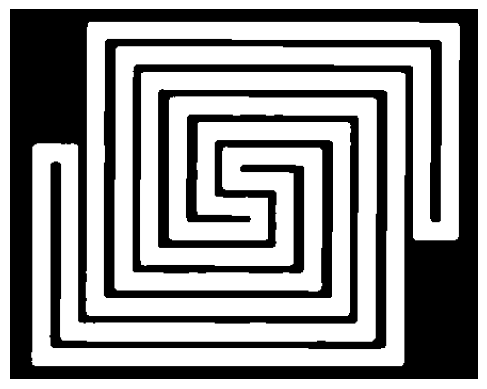

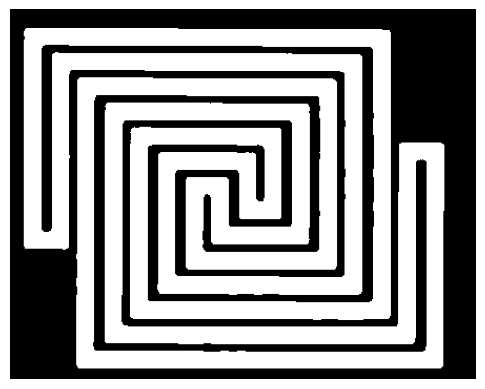

In [66]:
# show both images
img2_cover = cv2.imread(path_cover2, cv2.IMREAD_GRAYSCALE)
img1_cover = cv2.imread(path_cover1, cv2.IMREAD_GRAYSCALE)

ret,thresh = cv2.threshold(img2_cover,127,255,cv2.THRESH_BINARY)
ret1, thresh1 = cv2.threshold(img1_cover, 127, 255, cv2.THRESH_BINARY)
# show how many labels there are
labels, num_labels = label(thresh)
labels1, num_labels1 = label(thresh1)

# to black and white



plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(thresh1, cmap='gray')
plt.axis('off')
plt.show()



In [51]:
path_1 = "/Volumes/PRO-G40/Scriptie/data256+/testing_data/class_1/random_spiral_91.png"
img_1 = cv2.imread(path_1)
image_1 = cv2.threshold(img_1, 128, 255, cv2.THRESH_BINARY)[1]
image_256 = cv2.resize(image_1, (256, 256))
plt.imshow(img_1)

plt.axis('off')

[ WARN:0@737.156] global /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Volumes/PRO-G40/Scriptie/data256+/testing_data/class_1/random_spiral_91.png'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/runner/miniforge3/conda-bld/libopencv_1658893793880/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


(-0.5, 255.5, 255.5, -0.5)

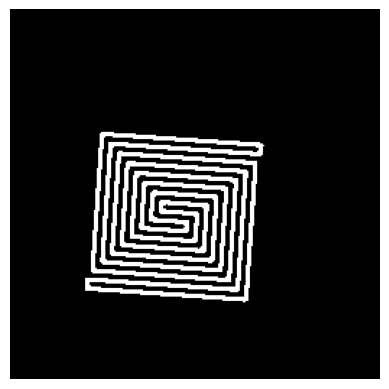

In [ ]:
plt.imshow(image_256)
plt.axis('off')

In [ ]:
img_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

In [67]:
# apply CCL using cv2
def apply_ccl(image):
    image = np.where(image > 0.5, 1, 0)
    image = np.uint8(image)
    _, labels = cv2.connectedComponents(image)
    return labels

# apply CCL using scipy
def apply_ccl_scipy(image):
    image = np.where(image > 0.5, 1, 0)
    image = np.uint8(image)
    labels, _ = label(image)
    return labels


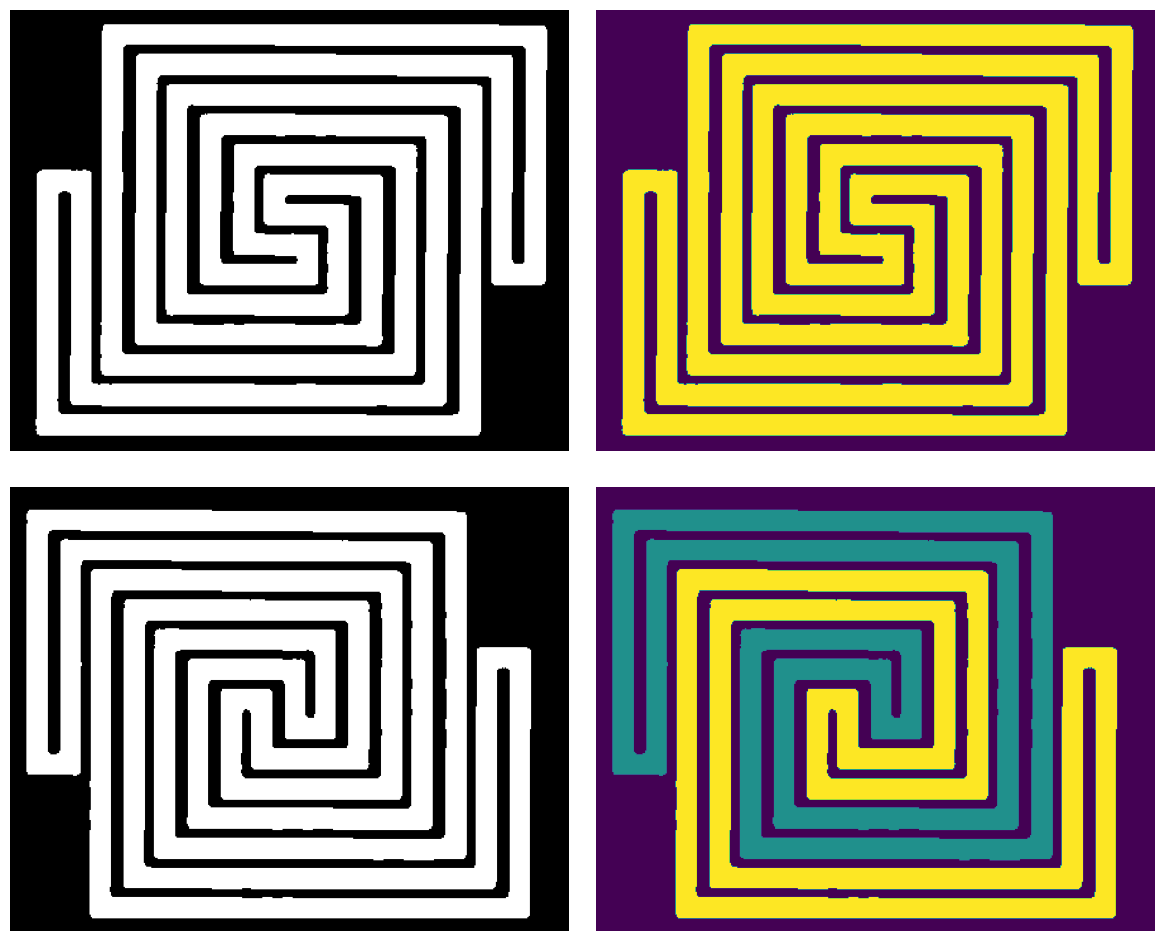

In [82]:
labels = apply_ccl(thresh)
labels1 = apply_ccl(thresh1)

# # show 
# plt.imshow(labels)
# plt.axis('off')
# plt.show()

plt.figure(figsize=(12, 10))

# First row, first column
plt.subplot(221)
plt.imshow(thresh, cmap='gray')
plt.axis('off')

# First row, second column
plt.subplot(222)
plt.imshow(labels)
plt.axis('off')

# Second row, first column
plt.subplot(223)
plt.imshow(thresh1, cmap='gray')
plt.axis('off')

# Second row, second column
plt.subplot(224)
plt.imshow(labels1)
plt.axis('off')

# Adjust the layout to add padding between the subplots
plt.tight_layout(pad=2.0)

# Display the combined figure
plt.show()



In [ ]:
labels = apply_ccl(img_1)
labels_scipy = apply_ccl_scipy(img_1)

(-0.5, 255.5, 255.5, -0.5)

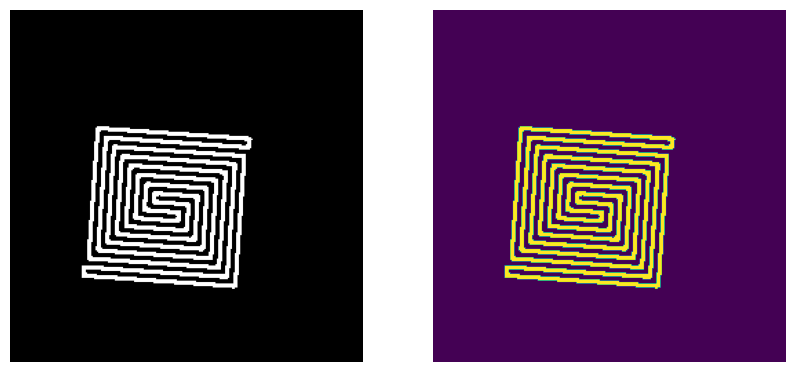

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_1)
plt.axis('off')
plt.subplot(122)
plt.imshow(labels)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

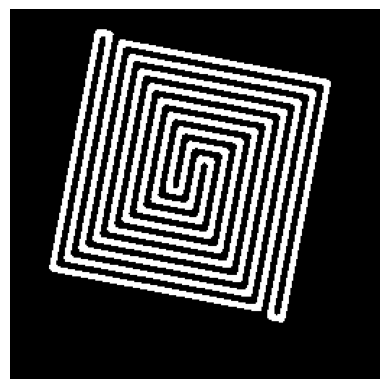

In [ ]:
path_2 = "/Volumes/PRO-G40/Scriptie/data256+/testing_data/class_2/random_spiral_82.png"
image = cv2.imread(path_2)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
plt.imshow(image)
plt.axis('off')


(-0.5, 255.5, 255.5, -0.5)

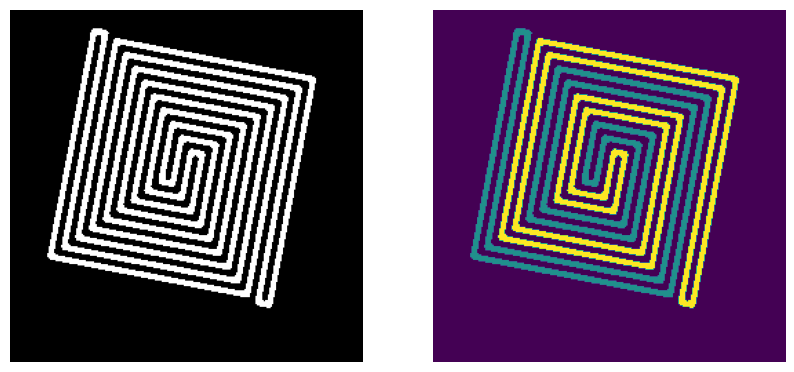

In [ ]:
img_2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
labels = apply_ccl(img_2)
labels_scipy = apply_ccl_scipy(img_2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(labels)
plt.axis('off')
